# Análise dos Concluintes de Computação usando Técnica de Agrupamento

# Importações e definição de variáveis globais.

Foram utilizadas as seguintes bibliotecas:
  - sklearn.cluster: 
    - Esse módulo contém a implementação do KMeans.
  - matplotlib.pyplot e seaborn: 
    - Esses módulos auxiliam na construção das visualizações.
  - pandas: 
    - Esse módulo fornece estruturas de alto desempenho, muito úteis para a análise de dados.
  - numpy: 
    - Esse módulo provê suporte para arrays, matrizes e uma variedade de rotinas para operações rápidas em arrays.
  - script: 
    - Arquivo que contém as funções implementadas para auxiliar no processo da visualização.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import script as sc
import numpy as np

anos = ['2008', '2011', '2014', '2017']
labelsClusters = ['Alto\ndesempenho', 'Médio\ndesempenho', 'Baixo\ndesempenho']
labelsClustersSemEspaco = ['Alto desempenho', 'Médio desempenho', 'Baixo desempenho']

c:\ferramentass\Python3.9\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ferramentass\Python3.9\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\ferramentass\Python3.9\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Quantidade de alunos no anos

In [2]:
dadosNormalizados = pd.read_csv('./dados_enade_n.csv')
dadosNaoNormalizados = pd.read_csv('./dados_enade_nn.csv')

print('Quantidade de dados e atributos pelos anos:')

for ano in anos:
  print('> {}: {}'.format(ano, dadosNormalizados.loc[dadosNormalizados['ano'] == int(ano)].shape))

Quantidade de dados e atributos pelos anos:
> 2008: (11524, 89)
> 2011: (32157, 89)
> 2014: (40737, 89)
> 2017: (38803, 89)


# Execução do K-means

In [3]:
dados = dadosNormalizados

dadosKmeans = dados[['nota_geral', 'sexo', 'recebeu_cota', 'trabalha', 'livros_ano', 'horas_estudo', 'condicoes_salas_estudantes', 'plano_ensino', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'ADS', 'BCC', 'EC', 'RC', 'SI', 'LCC', 'GTI', 'Regiao CO', 'Regiao N', 'Regiao NE', 'Regiao S', 'Regiao SE', 'IES privada', 'IES publica', 'Turno diurno', 'Turno integral', 'Turno noturno', 'EM particular', 'EM publico', 'EM exterior', 'Raca amarela', 'Raca branca', 'Raca indígena', 'Raca parda', 'Raca preta', 'Pai EF', 'Pai EM', 'Pai ES', 'Pai Nenhum', 'Mae EF', 'Mae EM', 'Mae ES', 'Mae Nenhum', 'Casado', 'Divorciado', 'Solteiro', 'Viúvo', 'Moradia cônjuge/filhos', 'Moradia individual/coletiva', 'Moradia parentes', 'Moradia universidade', 'Moradia sozinho', 'EM EJA/Supletivo', 'EM tradicional', 'EM magistério', 'EM técnico']]
X = dadosKmeans.values

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(X)

dados['cluster'] = kmeans.labels_.tolist()

# Retornar para os valores não normalizados

In [5]:
dados['nota_geral_norm'] = dados['nota_geral']
colunasNormalizadasZscore = ['nota_geral', 'idade', 'idade_comeco_graduacao', 'tempo_ocioso', 'tempo_cursado', 'livros_ano', 'horas_estudo', 'pessoas_moradia', 'condicoes_praticas_materiais', 'plano_ensino', 'avaliacao_curso']
dados[colunasNormalizadasZscore] = dadosNaoNormalizados[colunasNormalizadasZscore]
dados

,ano,nota_geral,idade,sexo,recebeu_cota,trabalha,livros_ano,horas_estudo,pessoas_moradia,condicoes_salas_estudantes,...,Moradia individual/coletiva,Moradia parentes,Moradia universidade,Moradia sozinho,EM EJA/Supletivo,EM tradicional,EM magistério,EM técnico,cluster,nota_geral_norm
0,2008,31.1,32,0,0,1,1,2,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.532095
1,2008,32.2,37,1,0,1,1,1,1,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.446648
2,2008,32.6,23,0,0,1,0,3,4,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.415577
3,2008,24.3,34,0,0,1,2,1,1,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,-1.060310
4,2008,19.1,21,1,0,1,0,1,2,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-1.464240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123216,2017,46.8,20,1,0,0,0,1,5,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.515984
123217,2017,26.9,25,1,1,0,4,1,1,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,-1.042540
123218,2017,20.5,35,1,0,0,2,3,4,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,-1.543774
123219,2017,52.0,25,1,0,0,2,2,4,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.857933


# Ordenar os agrupamentos

Nessa etapa é feito uma ordenação: o agrupamento com a maior média da nota geral sendo o primeiro, o segundo sendo o agrupamento mediano e o terceiro sendo o agrupamento com a menor média da nota geral.

Essa ordenação é feita para manter uma padronização nas visualizações.

In [6]:
dados = sc.ordenarDesempenho(dados, labelsClusters, labelsClustersSemEspaco)

data1 = dados.loc[dados['cluster'] == 0]
data2 = dados.loc[dados['cluster'] == 1]
data3 = dados.loc[dados['cluster'] == 2]

# Visão geral dos agrupamentos

Nessa visualização, temos: 
  - Nota geral nos agrupamentos
  - Quantidade de alunos nos agrupamentos
  - Distribuição da nota geral pelos agrupamentos

In [7]:
dataMedia = sc.mediaNotaGeral(dados)
dataMedia

,nota_geral,cluster
0,52.470988,0.0
1,40.185112,1.0
2,32.075231,2.0


In [8]:
quantidadeAlunos = sc.quantidadeAlunos(dados)
quantidadeAlunos

,quantidade,cluster
0,3.6757,0.0
1,3.1743,1.0
2,5.4721,2.0


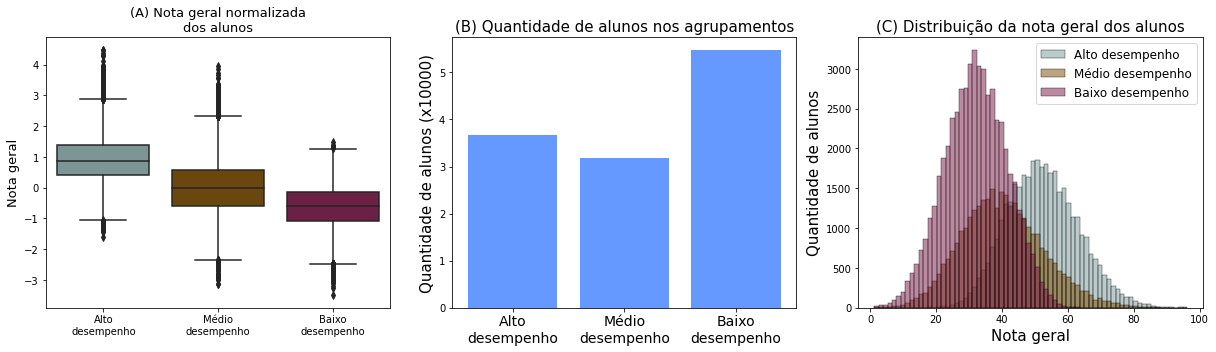

In [9]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(17)
fig.set_figheight(5)

# # nota geral dos clusters
# axs[0].bar(x=dataMedia['cluster'], height=dataMedia['nota_geral'], color='#6699ff', width=0.8)
# axs[0].set_xticks(dataMedia['cluster'])
# axs[0].set_xticklabels(labels=labelsClusters, fontsize=14)
# axs[0].set_ylabel('Nota geral', fontsize=15)
# axs[0].set_title('(A) Nota geral dos agrupamentos', fontsize=15)

# nota geral normalizada dos clusters
sns.boxplot(data=pd.concat([data1, data2, data3]), y='nota_geral_norm', x='cluster', palette=["#7899998F", "#784B003B", "#78154360"], ax = axs[0])
axs[0].set_xticklabels(labelsClusters)
axs[0].set_xlabel('')
axs[0].set_ylabel('Nota geral', fontsize=13)
axs[0].set_title('(A) Nota geral normalizada\ndos alunos', fontsize=13)

# quantidade de alunos nos agrupamentos
axs[1].bar(x=quantidadeAlunos['cluster'], height=quantidadeAlunos['quantidade'], color='#6699ff', width=0.8)
axs[1].set_xticks(dataMedia['cluster'])
axs[1].set_xticklabels(labels=labelsClusters, fontsize=14)
axs[1].set_ylabel('Quantidade de alunos (x10000)', fontsize=15)
axs[1].set_title('(B) Quantidade de alunos nos agrupamentos', fontsize=15)

# histograma das notas
sns.histplot(dados, bins = 70, x='nota_geral', hue='label cluster se', palette=["#78154360", "#784B003B", "#7899998F"], alpha=0.5, ax = axs[2], label=['A', 'B', 'C'])
axs[2].set_ylabel('Quantidade de alunos', fontsize=15)
axs[2].set_xlabel('Nota geral', fontsize=15)
plt.legend(labelsClustersSemEspaco, fontsize=12)
plt.title('(C) Distribuição da nota geral dos alunos', fontsize=15)

# config
fig.tight_layout()

plt.show()

# Alunos por agrupamento pelos anos

Nessa visualização, temos a quantidade de alunos pelos agrupamentos pelos anos.

In [10]:
quantidadeAlunosCluster = sc.quantidadeAlunosAno(dados)
quantidadeAlunosCluster

,cluster,ano,media
0,0.0,2008.0,27.629295
1,1.0,2008.0,22.639708
2,2.0,2008.0,49.730996
3,0.0,2011.0,26.718910
4,1.0,2011.0,27.651833
5,2.0,2011.0,45.629256
6,0.0,2014.0,29.619265
7,1.0,2014.0,27.039301
8,2.0,2014.0,43.341434
9,0.0,2017.0,33.283509


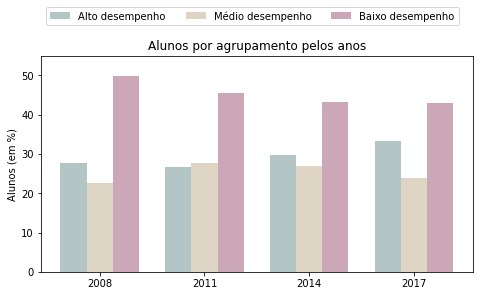

In [11]:
x = np.arange(4)
width = 0.25

fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])

ax.bar(x + 0.00, quantidadeAlunosCluster.loc[quantidadeAlunosCluster['cluster'] == 0, 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
ax.bar(x + 0.25, quantidadeAlunosCluster.loc[quantidadeAlunosCluster['cluster'] == 1, 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
ax.bar(x + 0.50, quantidadeAlunosCluster.loc[quantidadeAlunosCluster['cluster'] == 2, 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

plt.xticks([x + 0.25 for x in range(4)], anos)
fig.legend(labelsClustersSemEspaco, fontsize=10, loc='upper center', ncol=3, bbox_to_anchor=(0.49,1.25))
plt.title('Alunos por agrupamento pelos anos')
plt.ylim(0,55)
plt.ylabel('Alunos (em %)')

plt.show()

# Alunos pela categoria de ensino médio e da IES cursada

Nessa visualização, temos as informações sobre o tipo do Ensino Médio cursado do aluno, e a categoria da IES em que o aluno está matriculado.

In [12]:
categoriaIES = sc.categoriaIES(dados)
categoriaIES

,Cluster,IES,Valor (em %)
0,0,privada,19.483937
1,1,privada,27.691265
2,2,privada,52.824798
3,0,publica,56.259736
4,1,publica,20.830208
5,2,publica,22.910056


In [13]:
dataEM = sc.tipoEM(dados)
dataEM

,Cluster,Ensino,Valor (em %)
0,0,particular,42.807236
1,1,particular,22.128509
2,2,particular,35.064255
3,0,publico,23.535516
4,1,publico,27.499125
5,2,publico,48.965359


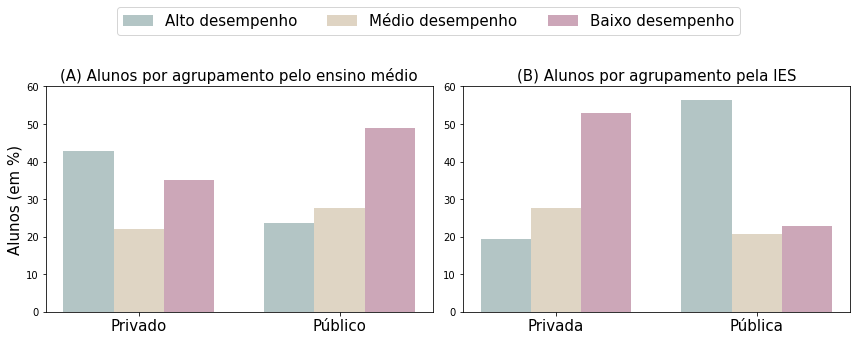

In [14]:
# config
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)

label = ['Privado', 'Público']
qtd = len(label)
x = np.arange(qtd)
dim = [x + 0.25 for x in range(qtd)]
width = 0.25

# alunos cotistas
l1 = axs[0].bar(x + 0.00, dataEM.loc[dataEM['Cluster'] == 0, 'Valor (em %)'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0].bar(x + 0.25, dataEM.loc[dataEM['Cluster'] == 1, 'Valor (em %)'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0].bar(x + 0.50, dataEM.loc[dataEM['Cluster'] == 2, 'Valor (em %)'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[0].set_ylabel('Alunos (em %)', fontsize=15)
axs[0].set_title('(A) Alunos por agrupamento pelo ensino médio', fontsize=15)
axs[0].set_xticks(dim, label, fontsize=15)
axs[0].set_ylim(0,60)

label = ['Privada', 'Pública']

# alunos nao cotistas
l1 = axs[1].bar(x + 0.00, categoriaIES.loc[categoriaIES['Cluster'] == 0, 'Valor (em %)'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1].bar(x + 0.25, categoriaIES.loc[categoriaIES['Cluster'] == 1, 'Valor (em %)'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1].bar(x + 0.50, categoriaIES.loc[categoriaIES['Cluster'] == 2, 'Valor (em %)'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[1].set_title('(B) Alunos por agrupamento pela IES', fontsize=15)
axs[1].set_xticks(dim, label, fontsize=15)
axs[1].set_ylim(0,60)

# config
fig.legend(labelsClustersSemEspaco, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.2))
fig.tight_layout()

plt.show()

# Alunos pela escolaridade dos pais

Nessa visualização, temos uma comparação entre os alunos, pelos agrupamentos, pelas escolaridades dos pais, e logo após, uma visualização juntando as duas informações.

In [15]:
dataEMPai, dataEMMae = sc.tipoEMPais(dados)
dataEMPai

,Cluster,Ensino,Valor (em %)
0,0,fundamental,21.555944
1,1,fundamental,27.705544
2,2,fundamental,50.738513
3,0,medio,31.074975
4,1,medio,25.140914
5,2,medio,43.784110
6,0,superior,42.658645
7,1,superior,23.241656
8,2,superior,34.099699


In [16]:
dataEMMae

,Cluster,Ensino,Valor (em %)
0,0,fundamental,20.770025
1,1,fundamental,27.889393
2,2,fundamental,51.340582
3,0,medio,30.600576
4,1,medio,24.906496
5,2,medio,44.492928
6,0,superior,41.132180
7,1,superior,24.137189
8,2,superior,34.730631


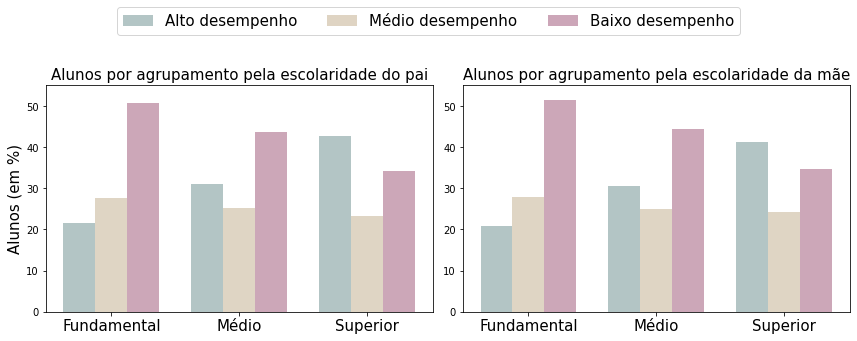

In [17]:
# config
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)

label = ['Fundamental', 'Médio', 'Superior']
qtd = len(label)
x = np.arange(qtd)
dim = [x + 0.25 for x in range(qtd)]
width = 0.25

# alunos cotistas
l1 = axs[0].bar(x + 0.00, dataEMPai.loc[dataEMPai['Cluster'] == 0, 'Valor (em %)'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0].bar(x + 0.25, dataEMPai.loc[dataEMPai['Cluster'] == 1, 'Valor (em %)'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0].bar(x + 0.50, dataEMPai.loc[dataEMPai['Cluster'] == 2, 'Valor (em %)'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[0].set_ylabel('Alunos (em %)', fontsize=15)
axs[0].set_title('Alunos por agrupamento pela escolaridade do pai', fontsize=15)
axs[0].set_xticks(dim, label, fontsize=15)
axs[0].set_ylim(0,55)

# alunos nao cotistas
l1 = axs[1].bar(x + 0.00, dataEMMae.loc[dataEMMae['Cluster'] == 0, 'Valor (em %)'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1].bar(x + 0.25, dataEMMae.loc[dataEMMae['Cluster'] == 1, 'Valor (em %)'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1].bar(x + 0.50, dataEMMae.loc[dataEMMae['Cluster'] == 2, 'Valor (em %)'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[1].set_title('Alunos por agrupamento pela escolaridade da mãe', fontsize=15)
axs[1].set_xticks(dim, label, fontsize=15)
axs[1].set_ylim(0,55)

# config
fig.legend(labelsClustersSemEspaco, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.2))
fig.tight_layout()

plt.show()

In [18]:
dataEMPais = sc.tipoEMPais(dados, True, dataEMPai, dataEMMae)
dataEMPais

,cluster,Ensino,Valor (em %)
0,0,fundamental,21.162984
1,0,medio,30.837776
2,0,superior,41.895412
3,1,fundamental,27.797468
4,1,medio,25.023705
5,1,superior,23.689423
6,2,fundamental,51.039547
7,2,medio,44.138519
8,2,superior,34.415165


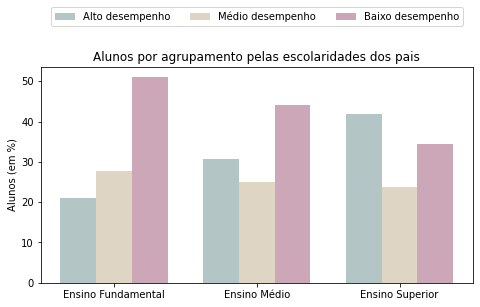

In [19]:
x = np.arange(3)
width = 0.25

fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])

ax.bar(x + 0.00, dataEMPais.loc[dataEMPais['cluster'] == 0, 'Valor (em %)'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
ax.bar(x + 0.25, dataEMPais.loc[dataEMPais['cluster'] == 1, 'Valor (em %)'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
ax.bar(x + 0.50, dataEMPais.loc[dataEMPais['cluster'] == 2, 'Valor (em %)'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

label = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']
plt.xticks([x + 0.25 for x in range(3)], label)
plt.title('Alunos por agrupamento pelas escolaridades dos pais')

fig.legend(labelsClustersSemEspaco, fontsize=10, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.3))
plt.ylabel('Alunos (em %)')

plt.show()

# Alunos cotistas e não cotistas pela categoria da IES cursada

Essa visualização, temos uma comparação entre os alunos cotistas que estudam em uma IES privada e pública, e os alunos não cotistas que estudam em uma IES privada e pública.

In [20]:
dataCotas, dataSemCotas = sc.cotas(dados)
dataCotas

,cluster,ano,media,ies
0,0,2008,0.015446,privada
1,0,2008,0.006595,publica
2,1,2008,0.029243,privada
3,1,2008,0.002950,publica
4,2,2008,0.063433,privada
5,2,2008,0.005380,publica
6,0,2011,0.019498,privada
7,0,2011,0.012439,publica
8,1,2011,0.042852,privada
9,1,2011,0.007215,publica


In [21]:
dataSemCotas

,cluster,ano,media,ies
0,0,2008,0.155415,privada
1,0,2008,0.098837,publica
2,1,2008,0.164873,privada
3,1,2008,0.029330,publica
4,2,2008,0.393006,privada
5,2,2008,0.035491,publica
6,0,2011,0.124607,privada
7,0,2011,0.110645,publica
8,1,2011,0.186336,privada
9,1,2011,0.040116,publica


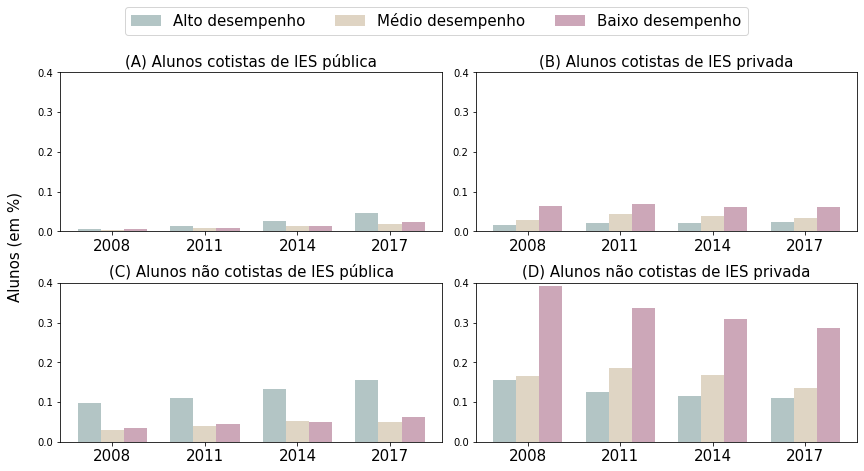

In [22]:
# config
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

label = ['2008', '2011', '2014', '2017']
qtd = len(label)
x = np.arange(qtd)
dim = [x + 0.25 for x in range(qtd)]
width = 0.25

l1 = axs[0][0].bar(x + 0.00, dataCotas.loc[(dataCotas['cluster'] == 0) & (dataCotas['ies'] == 'publica'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0][0].bar(x + 0.25, dataCotas.loc[(dataCotas['cluster'] == 1) & (dataCotas['ies'] == 'publica'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0][0].bar(x + 0.50, dataCotas.loc[(dataCotas['cluster'] == 2) & (dataCotas['ies'] == 'publica'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[0][0].set_ylabel('Alunos (em %)', fontsize=15)
axs[0][0].yaxis.set_label_coords(-0.1, -0.1)
axs[0][0].set_title('(A) Alunos cotistas de IES pública', fontsize=15)
axs[0][0].set_xticks(dim, label, fontsize=15)
axs[0][0].set_ylim(0, 0.4)

l1 = axs[0][1].bar(x + 0.00, dataCotas.loc[(dataCotas['cluster'] == 0) & (dataCotas['ies'] == 'privada'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0][1].bar(x + 0.25, dataCotas.loc[(dataCotas['cluster'] == 1) & (dataCotas['ies'] == 'privada'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0][1].bar(x + 0.50, dataCotas.loc[(dataCotas['cluster'] == 2) & (dataCotas['ies'] == 'privada'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[0][1].set_title('(B) Alunos cotistas de IES privada', fontsize=15)
axs[0][1].set_xticks(dim, label, fontsize=15)
axs[0][1].set_ylim(0, 0.4)

l1 = axs[1][0].bar(x + 0.00, dataSemCotas.loc[(dataSemCotas['cluster'] == 0) & (dataSemCotas['ies'] == 'publica'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1][0].bar(x + 0.25, dataSemCotas.loc[(dataSemCotas['cluster'] == 1) & (dataSemCotas['ies'] == 'publica'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1][0].bar(x + 0.50, dataSemCotas.loc[(dataSemCotas['cluster'] == 2) & (dataSemCotas['ies'] == 'publica'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[1][0].set_title('(C) Alunos não cotistas de IES pública', fontsize=15)
axs[1][0].set_xticks(dim, label, fontsize=15)
axs[1][0].set_ylim(0, 0.4)

l1 = axs[1][1].bar(x + 0.00, dataSemCotas.loc[(dataSemCotas['cluster'] == 0) & (dataSemCotas['ies'] == 'privada'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1][1].bar(x + 0.25, dataSemCotas.loc[(dataSemCotas['cluster'] == 1) & (dataSemCotas['ies'] == 'privada'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1][1].bar(x + 0.50, dataSemCotas.loc[(dataSemCotas['cluster'] == 2) & (dataSemCotas['ies'] == 'privada'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[1][1].set_title('(D) Alunos não cotistas de IES privada', fontsize=15)
axs[1][1].set_xticks(dim, label, fontsize=15)
axs[1][1].set_ylim(0, 0.4)

# config
fig.legend(labelsClustersSemEspaco, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.1))
fig.tight_layout()

plt.show()

# Alunos pelo turno

Nessa visualização, temos uma comparação entre os alunos estudantes dos turnos: noturno, diurno e integral.

In [23]:
dataTurnoNoturno, dataTurnoDiurno, dataTurnoIntegral = sc.turnos(dados)
dataTurnoNoturno

,cluster,ano,media
0,0.0,2008.0,17.814995
1,1.0,2008.0,19.029851
2,2.0,2008.0,45.253384
3,0.0,2011.0,14.960973
4,1.0,2011.0,22.318624
5,2.0,2011.0,40.184097
6,0.0,2014.0,16.348774
7,1.0,2014.0,20.980926
8,2.0,2014.0,37.135773
9,0.0,2017.0,15.743628


In [24]:
dataTurnoDiurno

,cluster,ano,media
0,0.0,2008.0,5.692468
1,1.0,2008.0,2.568553
2,2.0,2008.0,3.731343
3,0.0,2011.0,6.185278
4,1.0,2011.0,3.430046
5,2.0,2011.0,4.219921
6,0.0,2014.0,6.149201
7,1.0,2014.0,3.412131
8,2.0,2014.0,4.232025
9,0.0,2017.0,6.654125


In [25]:
dataTurnoIntegral

,cluster,ano,media
0,0.0,2008.0,4.121833
1,1.0,2008.0,1.041305
2,2.0,2008.0,0.746269
3,0.0,2011.0,5.572659
4,1.0,2011.0,1.903163
5,2.0,2011.0,1.225239
6,0.0,2014.0,7.121290
7,1.0,2014.0,2.646243
8,2.0,2014.0,1.973636
9,0.0,2017.0,10.885756


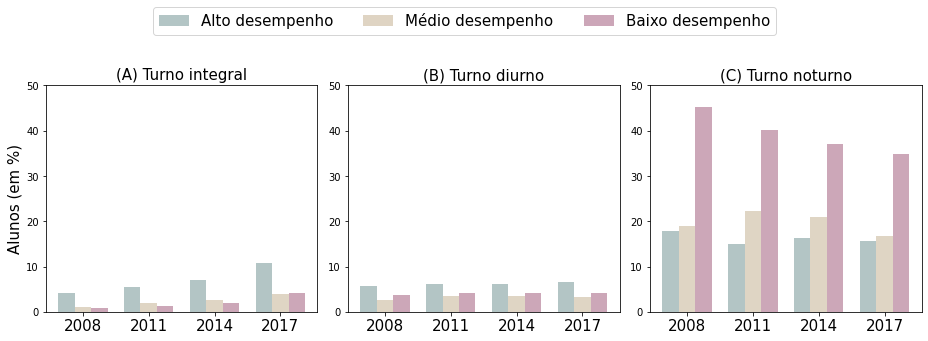

In [26]:
# config
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(13)
fig.set_figheight(4)

label = ['2008', '2011', '2014', '2017']
qtd = len(label)
x = np.arange(qtd)
dim = [x + 0.25 for x in range(qtd)]
width = 0.25

# turno integral
l1 = axs[0].bar(x + 0.00, dataTurnoIntegral.loc[dataTurnoIntegral['cluster'] == 0, 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0].bar(x + 0.25, dataTurnoIntegral.loc[dataTurnoIntegral['cluster'] == 1, 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0].bar(x + 0.50, dataTurnoIntegral.loc[dataTurnoIntegral['cluster'] == 2, 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[0].set_ylabel('Alunos (em %)', fontsize=15)
axs[0].set_title('(A) Turno integral', fontsize=15)
axs[0].set_xticks(dim, label, fontsize=15)
axs[0].set_ylim(0,50)

# turno diurno
l1 = axs[1].bar(x + 0.00, dataTurnoDiurno.loc[dataTurnoDiurno['cluster'] == 0, 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1].bar(x + 0.25, dataTurnoDiurno.loc[dataTurnoDiurno['cluster'] == 1, 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1].bar(x + 0.50, dataTurnoDiurno.loc[dataTurnoDiurno['cluster'] == 2, 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[1].set_title('(B) Turno diurno', fontsize=15)
axs[1].set_xticks(dim, label, fontsize=15)
axs[1].set_ylim(0,50)


# turno noturno
l1 = axs[2].bar(x + 0.00, dataTurnoNoturno.loc[dataTurnoNoturno['cluster'] == 0, 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[2].bar(x + 0.25, dataTurnoNoturno.loc[dataTurnoNoturno['cluster'] == 1, 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[2].bar(x + 0.50, dataTurnoNoturno.loc[dataTurnoNoturno['cluster'] == 2, 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])
axs[2].set_title('(C) Turno noturno', fontsize=15)
axs[2].set_xticks(dim, label, fontsize=15)
axs[2].set_ylim(0,50)

# config
fig.legend(labelsClustersSemEspaco, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.2))
fig.tight_layout()

plt.show()

# Alunos pelo curso de graduação

Nessa visualização teremos um comparativo entre todos os cursos de computação.


In [27]:
dataCurso = sc.cursos(dados)

e:\UTFPR\sbie\Analise-Enade\script.py:373: RuntimeWarning: invalid value encountered in longlong_scalars
  notaCursoAno.loc[IDX] = [i] + [ano] + [curso] + [datacluster.count()[0]/total]
e:\UTFPR\sbie\Analise-Enade\script.py:373: RuntimeWarning: invalid value encountered in longlong_scalars
  notaCursoAno.loc[IDX] = [i] + [ano] + [curso] + [datacluster.count()[0]/total]
e:\UTFPR\sbie\Analise-Enade\script.py:373: RuntimeWarning: invalid value encountered in longlong_scalars
  notaCursoAno.loc[IDX] = [i] + [ano] + [curso] + [datacluster.count()[0]/total]
e:\UTFPR\sbie\Analise-Enade\script.py:373: RuntimeWarning: invalid value encountered in longlong_scalars
  notaCursoAno.loc[IDX] = [i] + [ano] + [curso] + [datacluster.count()[0]/total]
e:\UTFPR\sbie\Analise-Enade\script.py:373: RuntimeWarning: invalid value encountered in longlong_scalars
  notaCursoAno.loc[IDX] = [i] + [ano] + [curso] + [datacluster.count()[0]/total]
e:\UTFPR\sbie\Analise-Enade\script.py:373: RuntimeWarning: invalid val

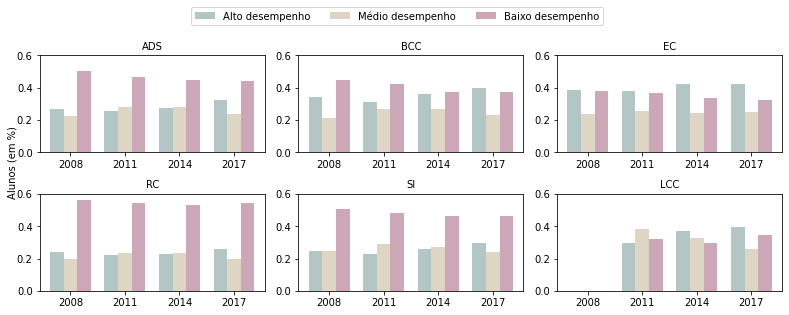

In [28]:
# config
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(11)
fig.set_figheight(4)

label = ['2008', '2011', '2014', '2017']
qtd = len(label)
x = np.arange(qtd)

dim = [x + 0.25 for x in range(qtd)]
width = 0.25

# alunos ADS
l1 = axs[0][0].bar(x + 0.00, dataCurso.loc[(dataCurso['cluster'] == 0) & (dataCurso['curso'] == 'ADS'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0][0].bar(x + 0.25, dataCurso.loc[(dataCurso['cluster'] == 1) & (dataCurso['curso'] == 'ADS'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0][0].bar(x + 0.50, dataCurso.loc[(dataCurso['cluster'] == 2) & (dataCurso['curso'] == 'ADS'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[0][0].set_ylabel('Alunos (em %)', fontsize=10)
axs[0][0].yaxis.set_label_coords(-0.1, -0.1)
axs[0][0].set_title('ADS', fontsize=10)
axs[0][0].set_xticks(dim, label, fontsize=10)
axs[0][0].set_ylim(0, 0.6)

# alunos BCC
l1 = axs[0][1].bar(x + 0.00, dataCurso.loc[(dataCurso['cluster'] == 0) & (dataCurso['curso'] == 'BCC'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0][1].bar(x + 0.25, dataCurso.loc[(dataCurso['cluster'] == 1) & (dataCurso['curso'] == 'BCC'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0][1].bar(x + 0.50, dataCurso.loc[(dataCurso['cluster'] == 2) & (dataCurso['curso'] == 'BCC'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[0][1].set_title('BCC', fontsize=10)
axs[0][1].set_xticks(dim, label, fontsize=10)
axs[0][1].set_ylim(0, 0.6)

# alunos EC
l1 = axs[0][2].bar(x + 0.00, dataCurso.loc[(dataCurso['cluster'] == 0) & (dataCurso['curso'] == 'EC'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[0][2].bar(x + 0.25, dataCurso.loc[(dataCurso['cluster'] == 1) & (dataCurso['curso'] == 'EC'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[0][2].bar(x + 0.50, dataCurso.loc[(dataCurso['cluster'] == 2) & (dataCurso['curso'] == 'EC'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[0][2].set_title('EC', fontsize=10)
axs[0][2].set_xticks(dim, label, fontsize=10)
axs[0][2].set_ylim(0, 0.6)

# alunos ADS
l1 = axs[1][0].bar(x + 0.00, dataCurso.loc[(dataCurso['cluster'] == 0) & (dataCurso['curso'] == 'RC'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1][0].bar(x + 0.25, dataCurso.loc[(dataCurso['cluster'] == 1) & (dataCurso['curso'] == 'RC'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1][0].bar(x + 0.50, dataCurso.loc[(dataCurso['cluster'] == 2) & (dataCurso['curso'] == 'RC'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[1][0].set_title('RC', fontsize=10)
axs[1][0].set_xticks(dim, label, fontsize=10)
axs[1][0].set_ylim(0, 0.6)

# alunos SI
l1 = axs[1][1].bar(x + 0.00, dataCurso.loc[(dataCurso['cluster'] == 0) & (dataCurso['curso'] == 'SI'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1][1].bar(x + 0.25, dataCurso.loc[(dataCurso['cluster'] == 1) & (dataCurso['curso'] == 'SI'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1][1].bar(x + 0.50, dataCurso.loc[(dataCurso['cluster'] == 2) & (dataCurso['curso'] == 'SI'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[1][1].set_title('SI', fontsize=10)
axs[1][1].set_xticks(dim, label, fontsize=10)
axs[1][1].set_ylim(0, 0.6)

# alunos LCC
l1 = axs[1][2].bar(x + 0.00, dataCurso.loc[(dataCurso['cluster'] == 0) & (dataCurso['curso'] == 'LCC'), 'media'].to_list(), width, color='#7899998F', label=labelsClustersSemEspaco[0])
l2 = axs[1][2].bar(x + 0.25, dataCurso.loc[(dataCurso['cluster'] == 1) & (dataCurso['curso'] == 'LCC'), 'media'].to_list(), width, color='#784B003B', label=labelsClustersSemEspaco[1])
l3 = axs[1][2].bar(x + 0.50, dataCurso.loc[(dataCurso['cluster'] == 2) & (dataCurso['curso'] == 'LCC'), 'media'].to_list(), width, color='#78154360', label=labelsClustersSemEspaco[2])

axs[1][2].set_title('LCC', fontsize=10)
axs[1][2].set_xticks(dim, label, fontsize=10)
axs[1][2].set_ylim(0, 0.6)

# config
fig.legend(labelsClustersSemEspaco, fontsize=10, loc='upper center', ncol=3, bbox_to_anchor=(0.5,1.1))
fig.tight_layout()

plt.show()